In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Bus_Breakdown_and_Delays.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326638 entries, 0 to 326637
Data columns (total 21 columns):
School_Year                        326638 non-null object
Busbreakdown_ID                    326638 non-null int64
Run_Type                           326635 non-null object
Bus_No                             326628 non-null object
Route_Number                       326631 non-null object
Reason                             326636 non-null object
Schools_Serviced                   326631 non-null object
Occurred_On                        326638 non-null object
Created_On                         326638 non-null object
Boro                               315480 non-null object
Bus_Company_Name                   326638 non-null object
How_Long_Delayed                   287337 non-null object
Number_Of_Students_On_The_Bus      326638 non-null int64
Has_Contractor_Notified_Schools    326638 non-null object
Has_Contractor_Notified_Parents    326638 non-null object
Have_You_Alerted_OPT 

In [7]:
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,New Jersey,...,NaN,11,Yes,No,Yes,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:12:14 AM,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,Manhattan,...,20MNS,2,Yes,Yes,No,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:13:34 AM,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/05/2015 08:09:00 AM,11/05/2015 08:13:00 AM,Bronx,...,15MIN,8,Yes,Yes,Yes,11/05/2015 08:13:00 AM,NaN,11/05/2015 08:13:22 AM,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,11/05/2015 08:12:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,15 MIN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:04 AM,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,11/05/2015 08:13:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,NaN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:08 AM,Running Late,School-Age
5,2015-2016,1227543,Special Ed AM Run,HT1502,W796,Heavy Traffic,75407,11/05/2015 07:58:00 AM,11/05/2015 08:14:00 AM,Westchester,...,30 min,1,Yes,Yes,Yes,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:15 AM,Running Late,School-Age
6,2015-2016,1227544,Special Ed AM Run,142,W633,Heavy Traffic,75670,11/05/2015 08:24:00 AM,11/05/2015 08:15:00 AM,Westchester,...,20MINS,3,Yes,No,No,11/05/2015 08:15:00 AM,NaN,11/05/2015 08:16:53 AM,Running Late,School-Age
7,2015-2016,1227545,Special Ed AM Run,1417,M678,Heavy Traffic,03417,11/05/2015 08:15:00 AM,11/05/2015 08:16:00 AM,Manhattan,...,15,3,Yes,Yes,No,11/05/2015 08:16:00 AM,NaN,11/05/2015 08:16:22 AM,Running Late,School-Age
8,2015-2016,1227546,Special Ed AM Run,56102,M126,Heavy Traffic,01450,11/05/2015 07:55:00 AM,11/05/2015 08:17:00 AM,Manhattan,...,30 mins,5,Yes,Yes,Yes,11/05/2015 08:17:00 AM,NaN,11/05/2015 08:17:07 AM,Running Late,School-Age
9,2015-2016,1227547,Special Ed AM Run,1344,M922,Heavy Traffic,02930,11/05/2015 08:16:00 AM,11/05/2015 08:17:00 AM,Manhattan,...,20,3,Yes,Yes,No,11/05/2015 08:17:00 AM,NaN,11/05/2015 08:17:03 AM,Running Late,School-Age


In [8]:
#for c in df.columns:
#    print("---",c,"---")
#    unq = df[c].value_counts() 
#    print(unq)
 
dtype_structure = {
    "category":["School_Year", "Busbreakdown_ID", "Run_Type", "Bus_No", "Route_Number", "Reason", 
                "Schools_Serviced", "Boro", "Bus_Company_Name", "Incident_Number", 
                "Breakdown_or_Running_Late", "School_Age_or_PreK"],
    #"float":   ["How_Long_Delayed"], # This will need to be cleaned later
    "int":     ["Number_Of_Students_On_The_Bus"],
    "datetime64":["Occurred_On", "Created_On", "Informed_On", "Last_Updated_On"],
    "bool":    ["Has_Contractor_Notified_Schools", "Has_Contractor_Notified_Parents", "Have_You_Alerted_OPT"],
    "object":  []    
}

In [9]:
print(df["How_Long_Delayed"][0:10])

0        NaN
1      20MNS
2      15MIN
3     15 MIN
4        NaN
5     30 min
6     20MINS
7         15
8    30 mins
9         20
Name: How_Long_Delayed, dtype: object


In [10]:
# Cleaning How_Long_Delayed as it is string entries and have different variations of data
delayed_str = df["How_Long_Delayed"].values
trial = ["-", "hr", "min", "/"]
for t in trial:
    matching = [s for s in delayed_str if t in str(s)]
    print(matching[0:6])

['15-20 mins', '10-15', '20-30 min', '25-30 MIN', '30-40', '31-45 Min']
['1hr', '1hr/30min', '1hr', '1 hr', '1hr', '45min/1hr']
['30 min', '30 mins', '10 min', '15 min', '20 min', '10/15 mins']
['10/15 mins', '25/30 MINS', '15/20 MINS', '15/20mins', '1hr/30min', '10/15 MINS']


In [12]:
#Coverting to clean data frame
for dtp, col in dtype_structure.items():
    df[col] = df[col].astype(dtp)
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326638 entries, 0 to 326637
Data columns (total 21 columns):
School_Year                        326638 non-null category
Busbreakdown_ID                    326638 non-null category
Run_Type                           326635 non-null category
Bus_No                             326628 non-null category
Route_Number                       326631 non-null category
Reason                             326636 non-null category
Schools_Serviced                   326631 non-null category
Occurred_On                        326638 non-null datetime64[ns]
Created_On                         326638 non-null datetime64[ns]
Boro                               315480 non-null category
Bus_Company_Name                   326638 non-null category
How_Long_Delayed                   287337 non-null object
Number_Of_Students_On_The_Bus      326638 non-null int32
Has_Contractor_Notified_Schools    326638 non-null bool
Has_Contractor_Notified_Parents    326638 non-

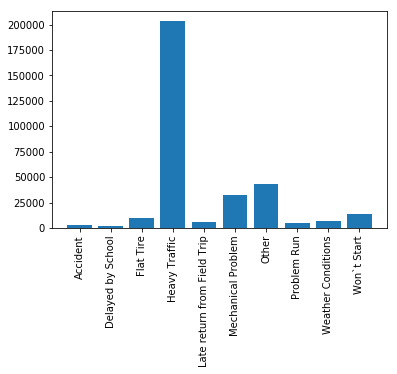

<Figure size 432x288 with 0 Axes>

In [19]:
# Common types of Delays
rsn = df.groupby("Reason").size()
lth = range(len(rsn))
plt.bar(lth, rsn)
plt.xticks(lth, rsn.index, rotation=90)
plt.show()
plt.savefig("Common_types_of_Delays.png")

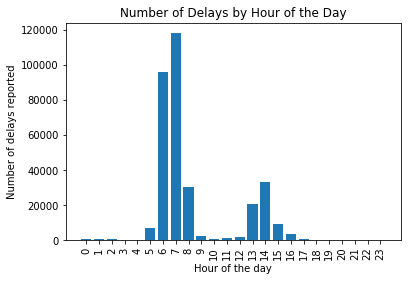

In [14]:
# Time delays occuring often
delay_time = df.groupby(df["Occurred_On"].map(lambda t: t.hour)).size()
lth = range(len(delay_time))
plt.bar(lth, delay_time)
plt.xticks(lth, delay_time.index, rotation=90)
plt.title("Number of Delays by Hour of the Day")
plt.ylabel("Number of delays reported")
plt.xlabel("Hour of the day")
plt.show()

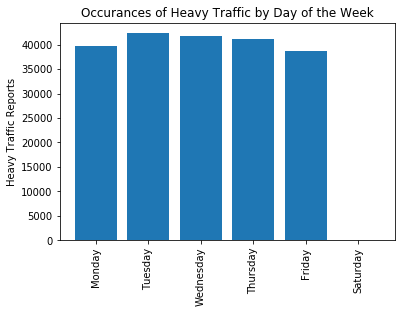

In [15]:
# Days worst for traffic
traff_day = df[df["Reason"] == "Heavy Traffic"].groupby(
                                                df["Occurred_On"].map(lambda t: t.weekday())).size()
wkd = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
lth = range(len(traff_day))
plt.bar(lth, traff_day)
plt.xticks(lth, wkd, rotation=90)
plt.title("Occurances of Heavy Traffic by Day of the Week")
plt.ylabel("Heavy Traffic Reports")
plt.show()

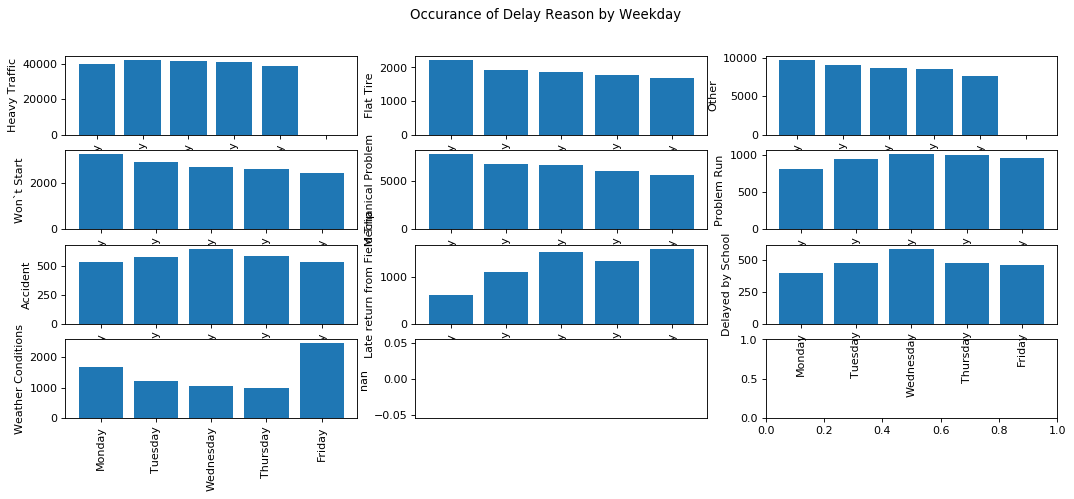

In [16]:
# Delay Reasons on a particular weekdays
wkd = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]#, "Saturday", "Sunday"]
nrows = 4
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 6), dpi=80)
plt.suptitle("Occurance of Delay Reason by Weekday")
i = 1
for rsn in df["Reason"].unique():
    reason_day = df[df["Reason"] == rsn].groupby(
                                        df["Occurred_On"].map(lambda t: t.weekday())).size()
    lth = range(len(reason_day))
    plt.subplot(nrows,ncols,i)
    plt.bar(lth, reason_day)
    plt.xticks(lth, wkd, rotation=90)
    #plt.title("Occurances of {r} by Day of the Week".format(r=rsn))
    plt.ylabel(str(rsn))
    i+=1 

# delete empty axes
# axes[5,0].set_axis_off()
plt.show()